In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


In [2]:
df = pd.read_csv("/kaggle/input/car-evaluation-data-set/car_evaluation.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
df.rename(columns={'low':'safety',"small":"lug_boot","2.1":"number of persons","2":"number of doors","vhigh":"buying price","vhigh.1":"maintenance cost"},inplace=True)
df.columns


Index(['buying price', 'maintenance cost', 'number of doors',
       'number of persons', 'lug_boot', 'safety', 'unacc'],
      dtype='object')

In [4]:
df.shape

(1727, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1727 non-null   object
 1   maintenance cost   1727 non-null   object
 2   number of doors    1727 non-null   object
 3   number of persons  1727 non-null   object
 4   lug_boot           1727 non-null   object
 5   safety             1727 non-null   object
 6   unacc              1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df.head()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.isnull().sum()

buying price         0
maintenance cost     0
number of doors      0
number of persons    0
lug_boot             0
safety               0
unacc                0
dtype: int64

In [8]:
df.dtypes

buying price         object
maintenance cost     object
number of doors      object
number of persons    object
lug_boot             object
safety               object
unacc                object
dtype: object

In [9]:
df.describe()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [10]:
li = list(df.columns)
li

['buying price',
 'maintenance cost',
 'number of doors',
 'number of persons',
 'lug_boot',
 'safety',
 'unacc']

**label encoding**

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in li:
    df[i] = labelencoder.fit_transform(df[i])

In [12]:
df.head()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


**split the data** 

In [13]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
x.head()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


In [15]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: unacc, dtype: int64

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30 ,random_state =1)


**Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)

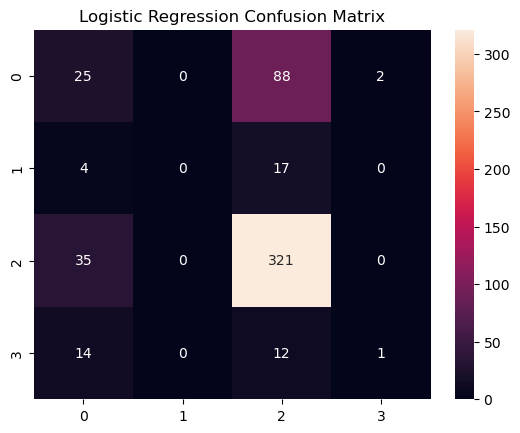

In [18]:
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='g')
plt.show()

In [19]:
print(f"Logistic Regression accuracy is : {round(accuracy_score(y_test,y_pred1)*100,2)} %")

Logistic Regression accuracy is : 66.86 %


In [20]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.32      0.22      0.26       115
           1       0.00      0.00      0.00        21
           2       0.73      0.90      0.81       356
           3       0.33      0.04      0.07        27

    accuracy                           0.67       519
   macro avg       0.35      0.29      0.28       519
weighted avg       0.59      0.67      0.62       519



**Random Forest**

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)

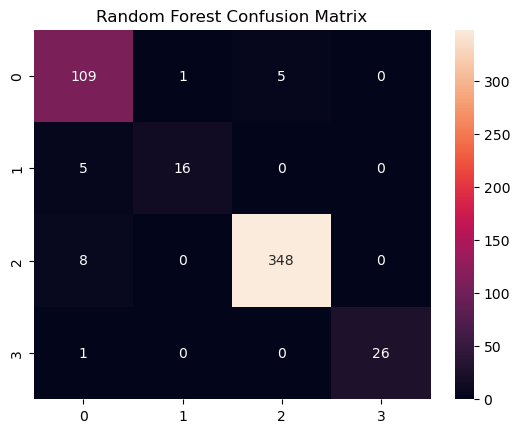

In [22]:
plt.title('Random Forest Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,fmt='g')
plt.show()

In [23]:
print(f"Random Forest accuracy is : {round(accuracy_score(y_test,y_pred2)*100,2)} %")

Random Forest accuracy is : 96.15 %


In [24]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       115
           1       0.94      0.76      0.84        21
           2       0.99      0.98      0.98       356
           3       1.00      0.96      0.98        27

    accuracy                           0.96       519
   macro avg       0.95      0.91      0.93       519
weighted avg       0.96      0.96      0.96       519



**knn**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=  KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred3=knn.predict(x_test)

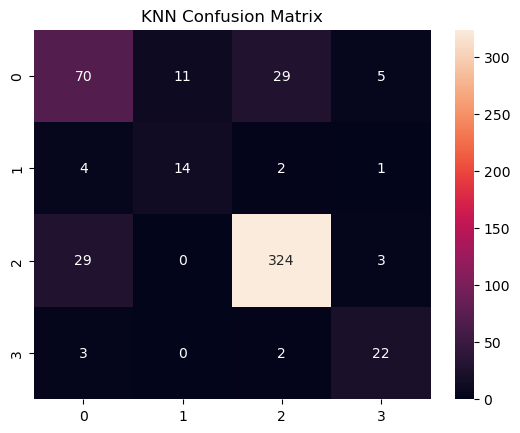

In [26]:
plt.title('KNN Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True,fmt='g')
plt.show()

In [27]:
print(f"KNN accuracy is : {round(accuracy_score(y_test,y_pred3)*100,2)} %")

KNN accuracy is : 82.85 %


In [28]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63       115
           1       0.56      0.67      0.61        21
           2       0.91      0.91      0.91       356
           3       0.71      0.81      0.76        27

    accuracy                           0.83       519
   macro avg       0.71      0.75      0.73       519
weighted avg       0.83      0.83      0.83       519



**Navie Bayes**

In [29]:
from sklearn.naive_bayes import *
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred4 = nb.predict(x_test)

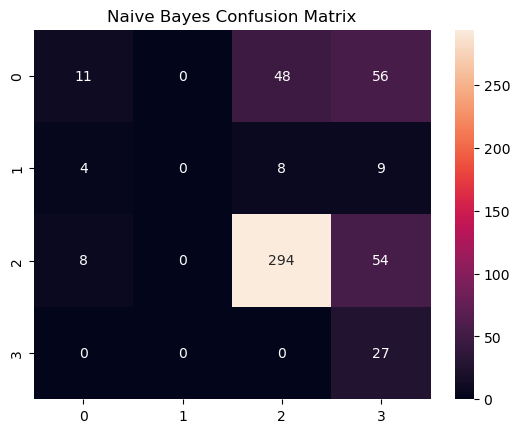

In [30]:
plt.title('Naive Bayes Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred4),annot=True,fmt='g')
plt.show()

In [31]:
print(f"Naive Bayes accuracy is : {round(accuracy_score(y_test,y_pred4)*100,2)} %")

Naive Bayes accuracy is : 63.97 %


In [32]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.48      0.10      0.16       115
           1       0.00      0.00      0.00        21
           2       0.84      0.83      0.83       356
           3       0.18      1.00      0.31        27

    accuracy                           0.64       519
   macro avg       0.38      0.48      0.33       519
weighted avg       0.69      0.64      0.62       519



**SVM**

In [33]:
from sklearn.svm import SVC

In [34]:
clf=SVC(kernel='linear',C=1.0)
clf.fit(x,y)

SVC(kernel='linear')

In [35]:
y_pred5=clf.predict(x_test)
y_pred5

array([2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [36]:
frame={'Predict': y_pred5,'Real': y_test}
df_clf=pd.DataFrame(frame)

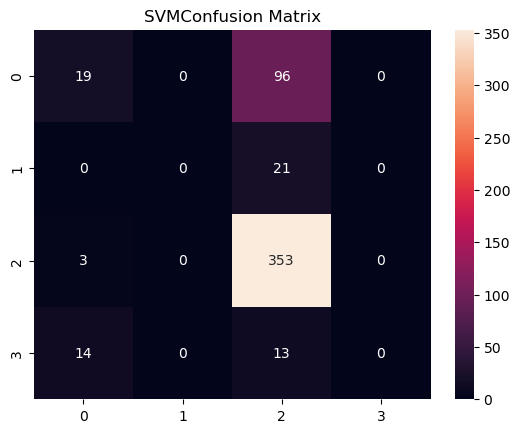

In [37]:
plt.title('SVMConfusion Matrix')
sns.heatmap(confusion_matrix(y_test,y_pred5),annot=True,fmt='g')
plt.show()

In [38]:
#accuracy_score(y_pred,y_test)
print(f"svm is : {round(accuracy_score(y_test,y_pred5)*100,2)} %")

svm is : 71.68 %


In [39]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.53      0.17      0.25       115
           1       0.00      0.00      0.00        21
           2       0.73      0.99      0.84       356
           3       0.00      0.00      0.00        27

    accuracy                           0.72       519
   macro avg       0.31      0.29      0.27       519
weighted avg       0.62      0.72      0.63       519



In [40]:
Accuracy = [round(accuracy_score(y_test,y_pred1)*100,2),round(accuracy_score(y_test,y_pred2)*100,2),
           round(accuracy_score(y_test,y_pred3)*100,2),round(accuracy_score(y_test,y_pred4)*100,2),
           round(accuracy_score(y_test,y_pred5)*100,2)]

Accuracy

[66.86, 96.15, 82.85, 63.97, 71.68]

In [41]:
df_clf.tail()

,Predict,Real
1636,2,3
490,2,2
1108,2,2
491,2,2
422,2,2


In [42]:
l = ['Logistic Regression','Random Forest','KNN','Naive Bayes','svm']

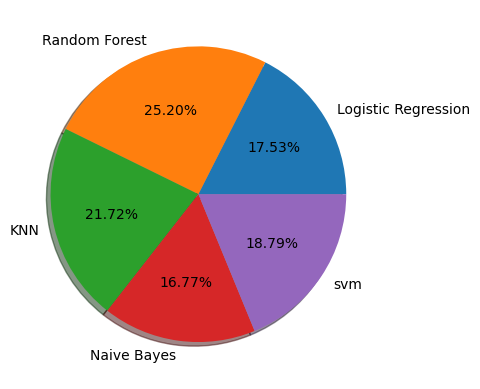

In [43]:
plt.pie(Accuracy,labels=l,shadow=True,autopct='%1.2f%%')
plt.show()

<Axes: >

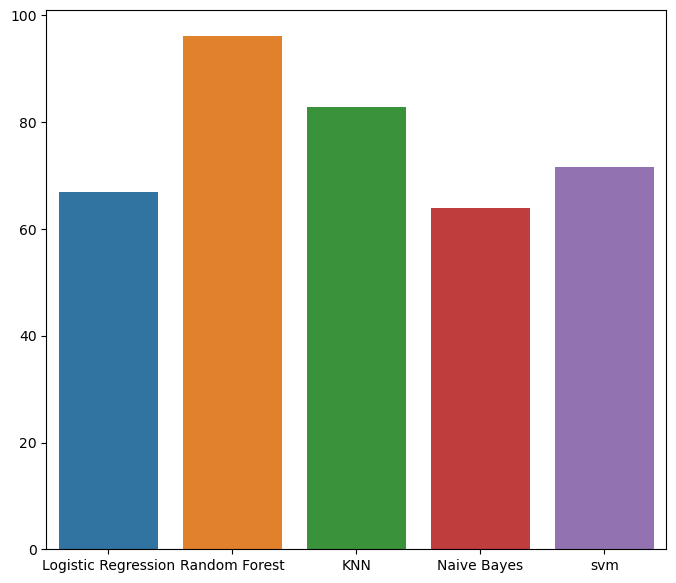

In [44]:
plt.figure(figsize=(8,7))
sns.barplot(x = l,y=Accuracy)